<a href="https://colab.research.google.com/github/Sottim/AIDA-Spring2023/blob/main/Anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#% matplotlib inline #matlab plotting library
import numpy as np

#pandas = panel data
import pandas as pd

#Statsmodel
import statsmodels.api as sm

#Ordinary Least Squares
from statsmodels.formula.api import ols

#Plotting
import matplotlib.pyplot as plt

import pandas.util.testing as tm

In [ ]:
#Read the data
X = pd.read_csv('insured.csv')
X.head()

,Group,Insurance
0,Company 1,36
1,Company 1,28
2,Company 1,32
3,Company 1,43
4,Company 1,30


In [ ]:
model = ols('Insurance~Group', data = X).fit()


In [ ]:
aov_table = sm.stats.anova_lm(model, typ=2)

#lm stands for linear model
print(aov_table)

               sum_sq    df         F    PR(>F)
Group      356.087963   2.0  3.834295  0.035891
Residual  1114.430556  24.0       NaN       NaN


<Axes: title={'center': 'Insurance'}, xlabel='Group'>

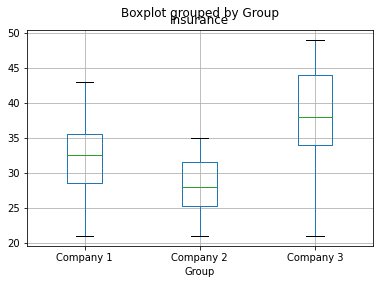

In [ ]:
X.boxplot('Insurance', 'Group')
#Important Assumption of ANOVA is Homogeneity of Variance across Groups

In [ ]:
#Check if the data is normally distributed
#Shapiro-Wilk Test
from scipy.stats import shapiro

#Normality Test
stat, p = shapiro(X['Insurance'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# f stands for floating number. .3f says 3 decimal points after the floating number
#Interpret
# Ho = data is normal

Statistics=0.971, p=0.632


In [ ]:
#Check if the data is normally distributed
# Shapiro-Wilk Test

from scipy.stats import shapiro

#Normality Test
stat, p = shapiro(X['Insurance'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# f stands for floating number. .3f says 3 decimal points after the floating number
#Interpret
# Ho = data is normal
# Ha = data is not normal
#if p-value < 0.05 reject the Null Hypothesis

alpha = 0.5

if p > alpha:
    print('Sample looks Gaussian (Normal) (fail to reject Ho)')
else:
    print('Sample does not look Gaussian (Normal) (reject Ho)')

Statistics=0.971, p=0.632
Sample looks Gaussian (Normal) (fail to reject Ho)
